<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV,RepeatedKFold
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
#from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(URL1,parse_dates=['Date'])

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
data['Year']=data['Date'].dt.year

Text(0.5, 1.0, 'Correlation heatmap of variables')

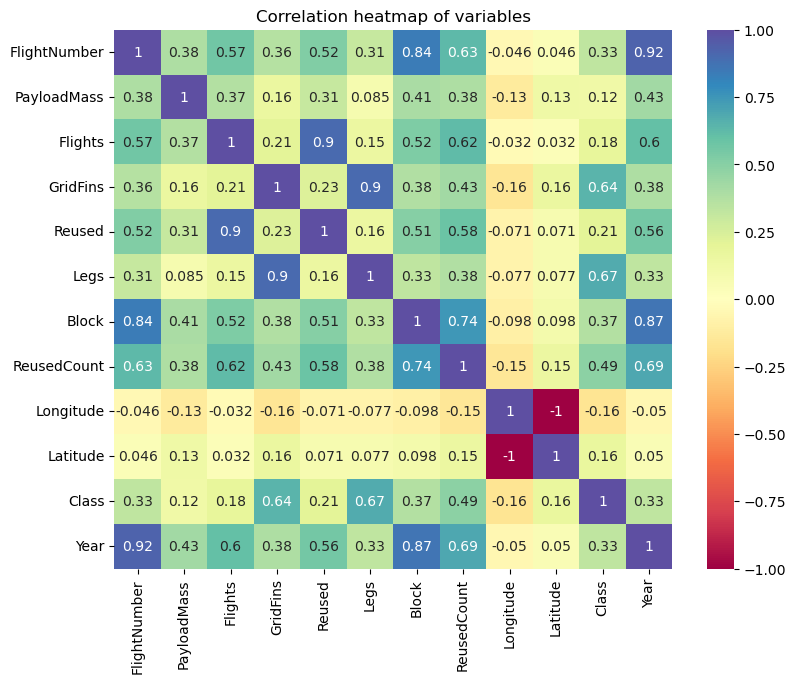

In [8]:
fig,ax=plt.subplots(1,1,figsize=[9,7])
sns.heatmap(data.corr(method='kendall',numeric_only=True),cmap='Spectral',annot=True,ax=ax)
ax.set_title("Correlation heatmap of variables")

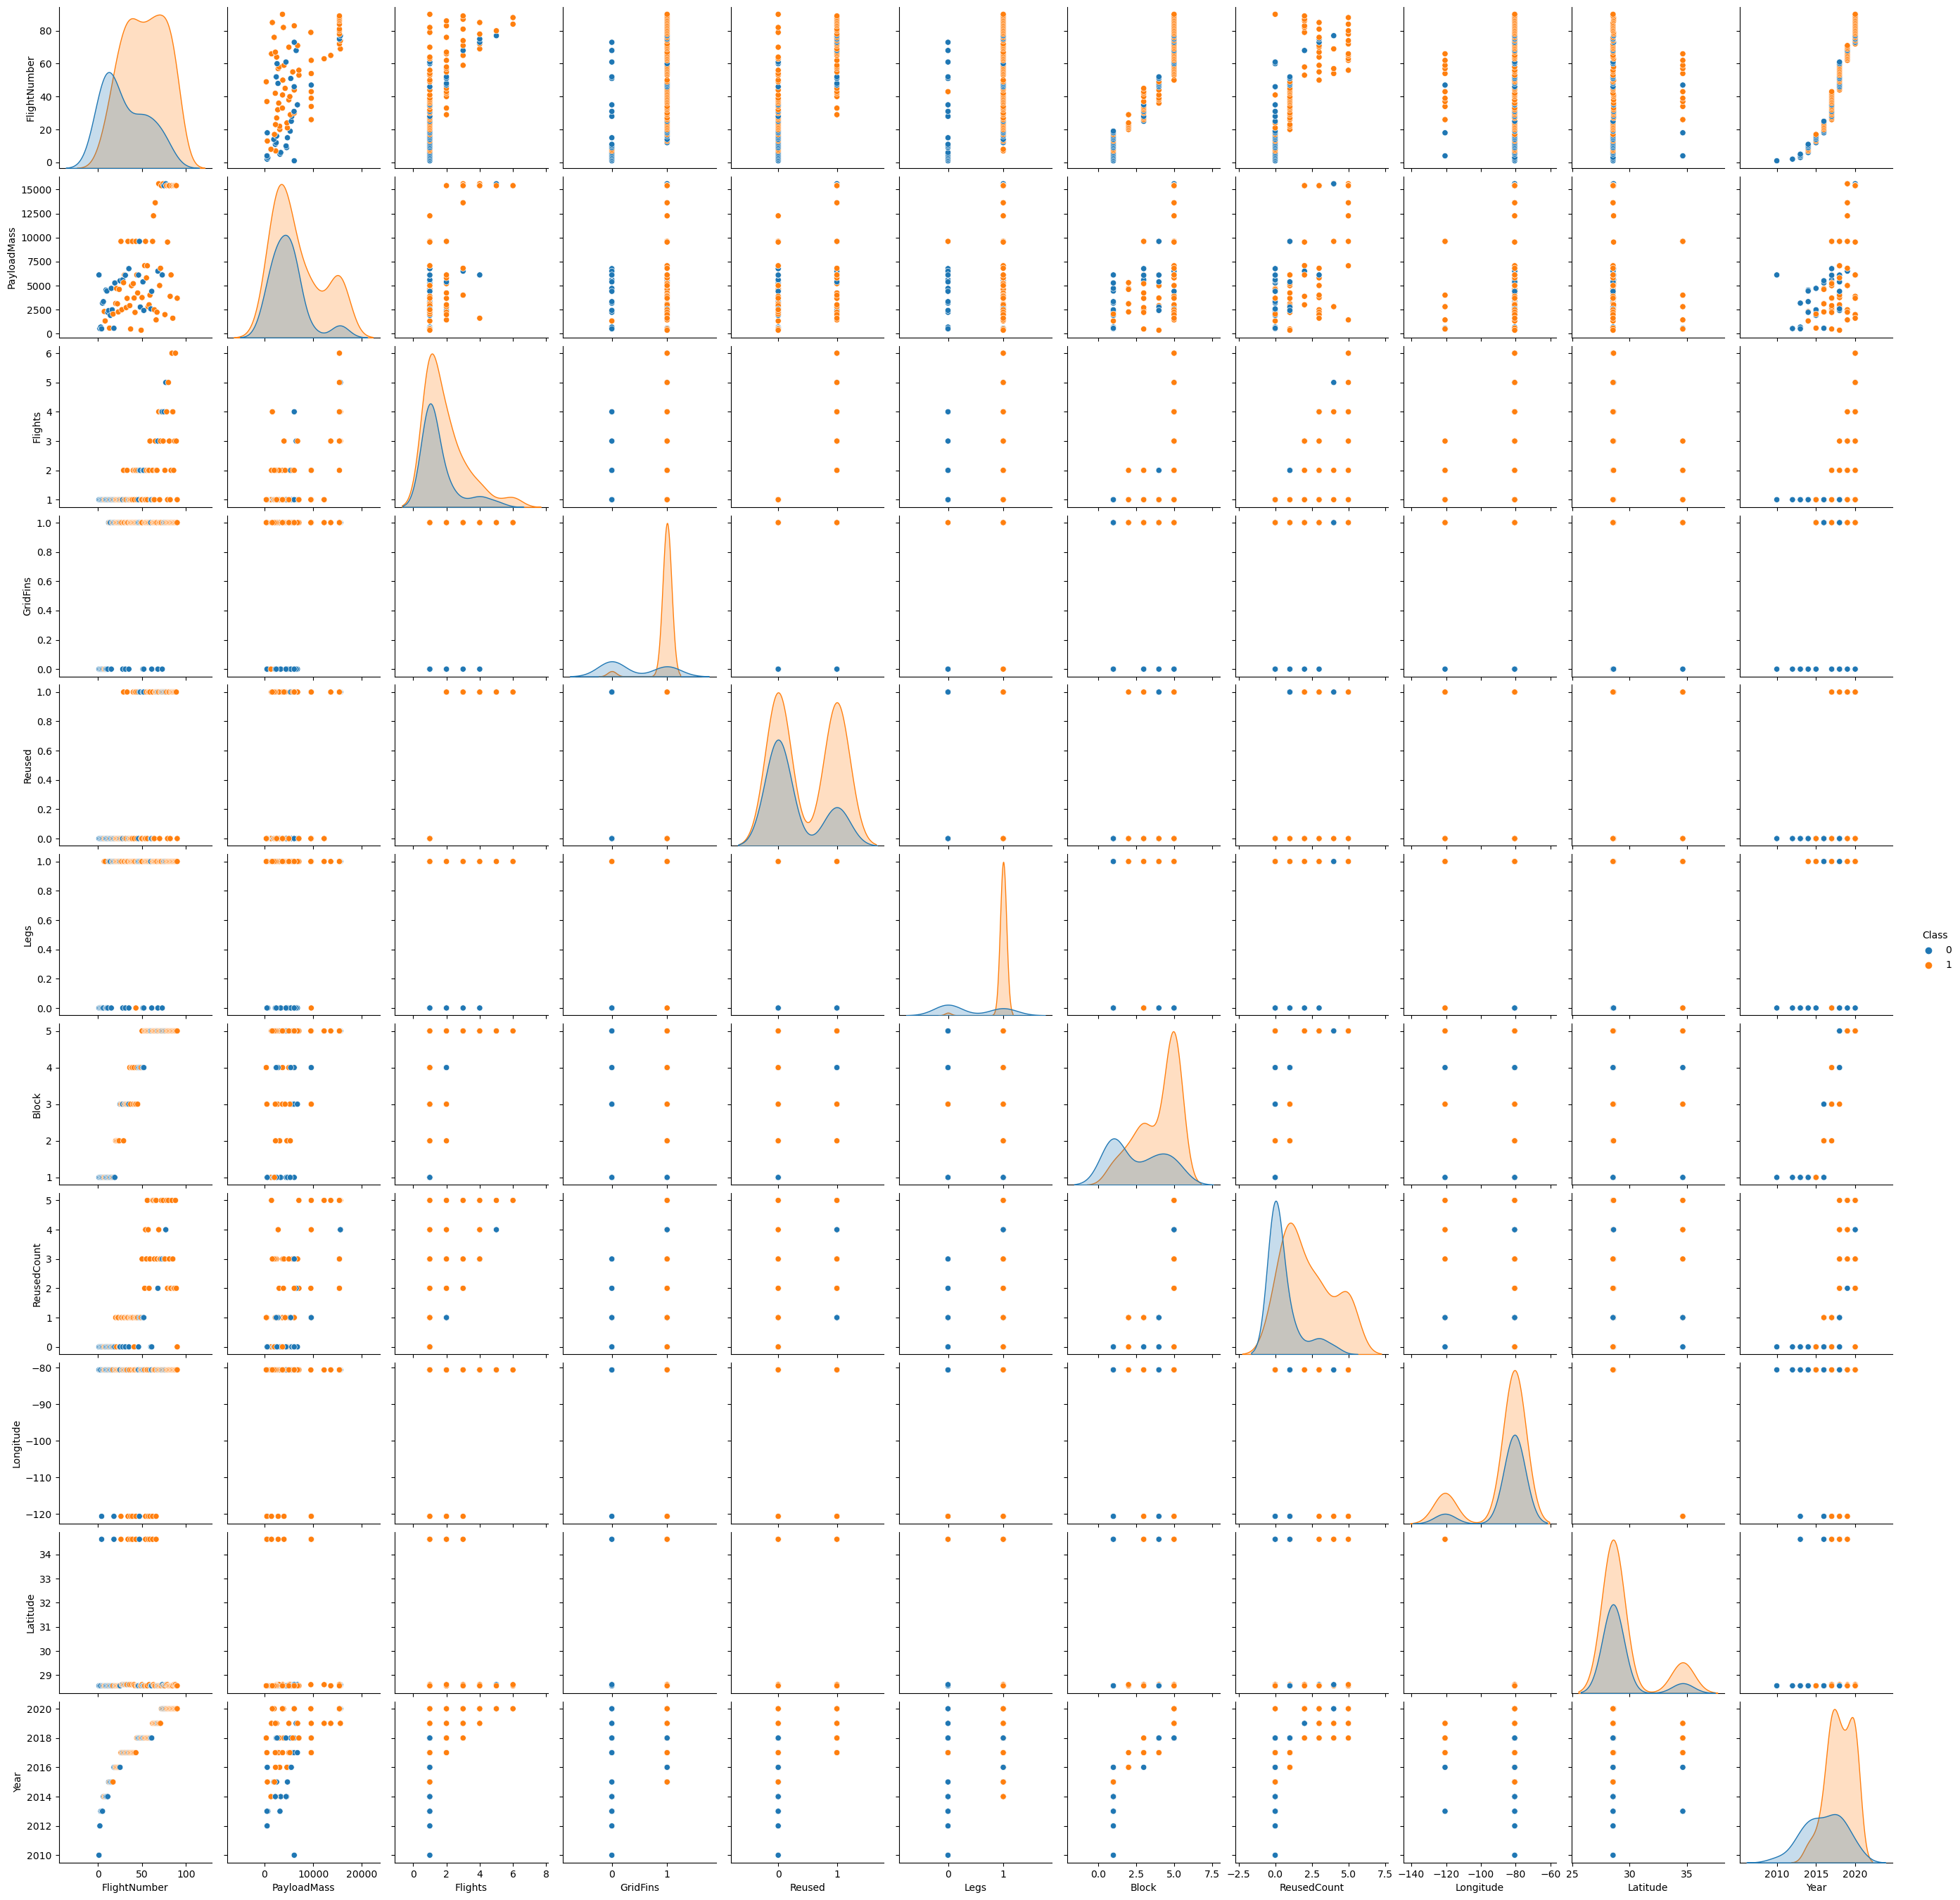

In [9]:
sns.pairplot(data,hue='Class')

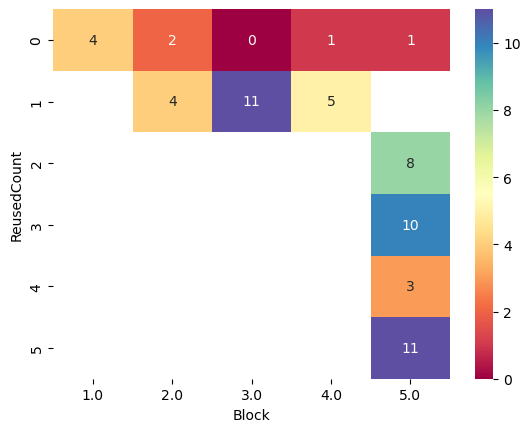

<AxesSubplot: xlabel='Block', ylabel='ReusedCount'>

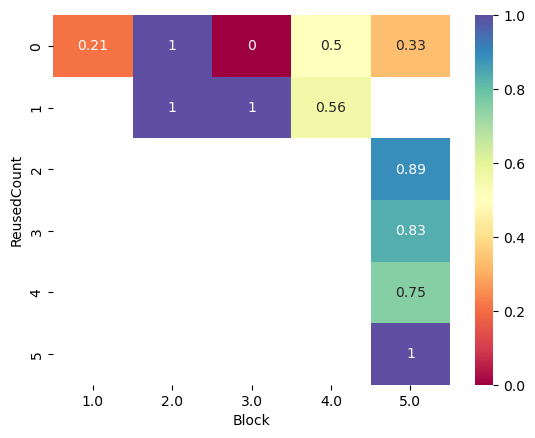

In [12]:
sns.heatmap(pd.pivot_table(data,'Class','ReusedCount','Block',aggfunc='sum'),cmap='Spectral',annot=True)
plt.show()
sns.heatmap(pd.pivot_table(data,'Class','ReusedCount','Block',aggfunc='mean'),cmap='Spectral',annot=True)

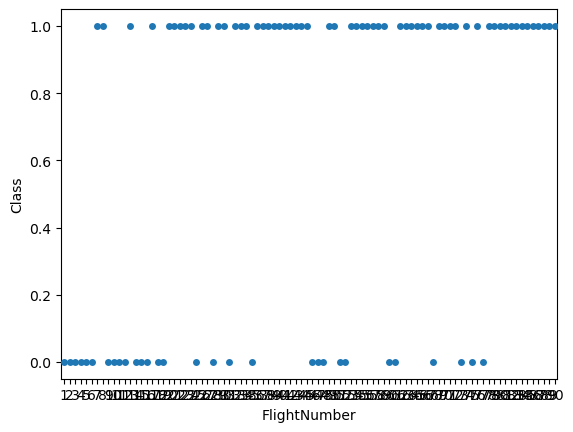

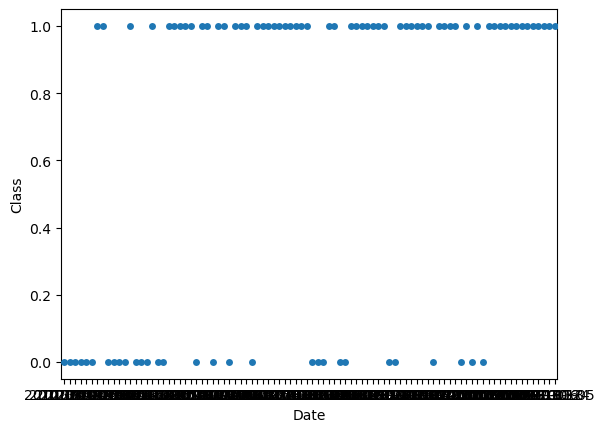

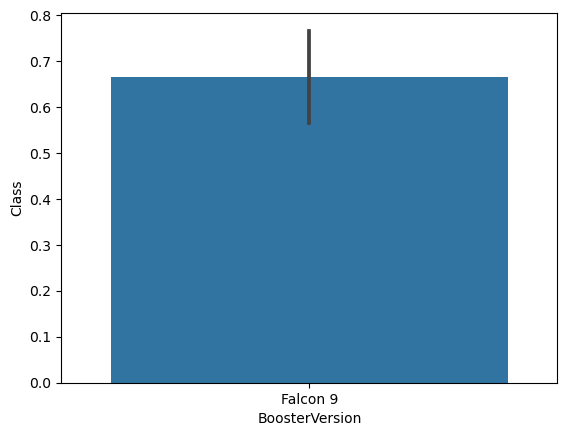

C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


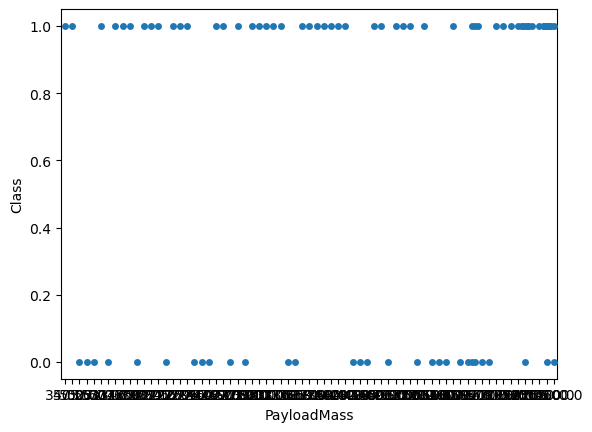

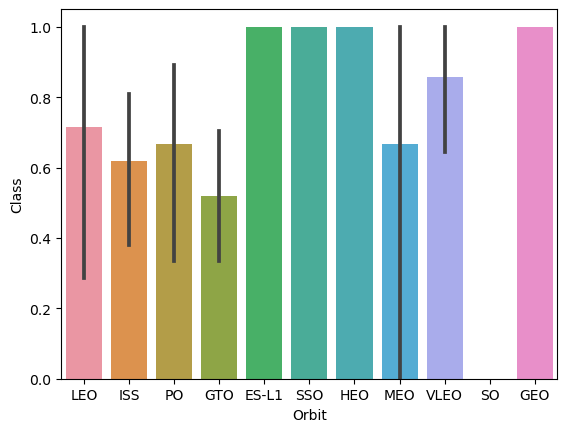

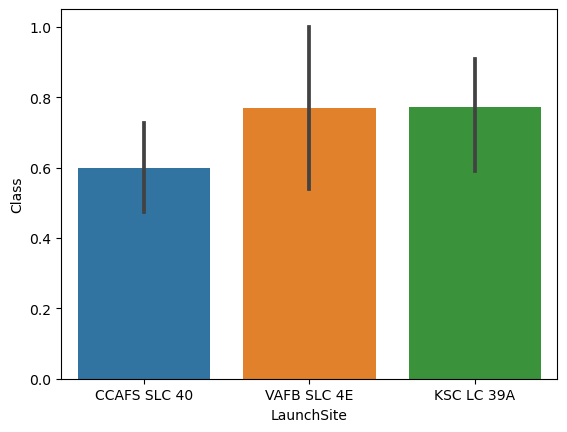

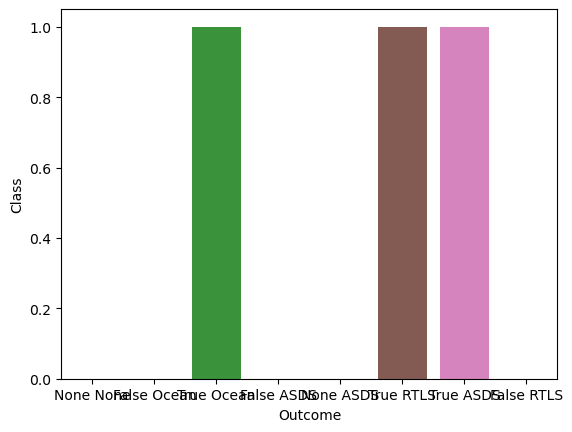

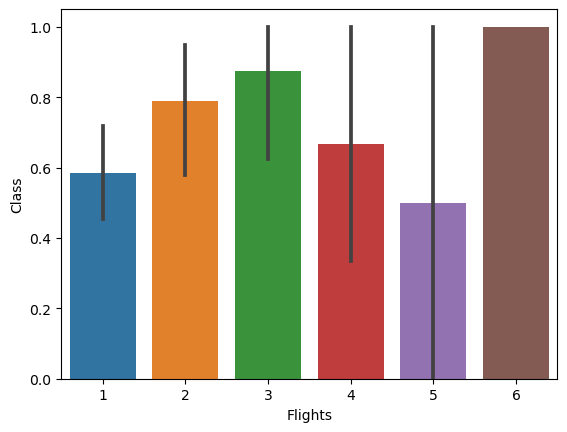

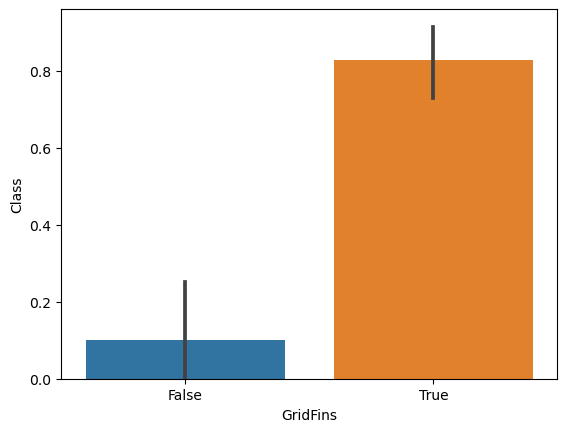

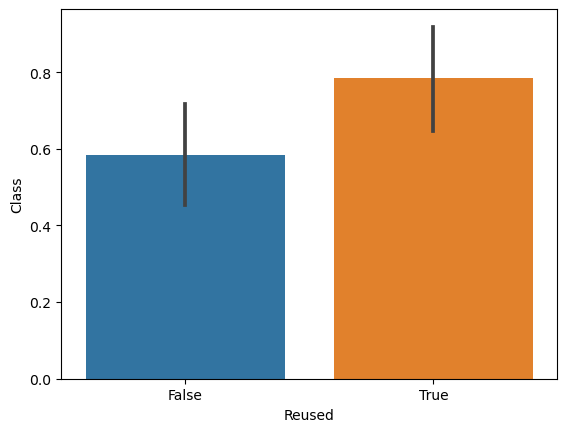

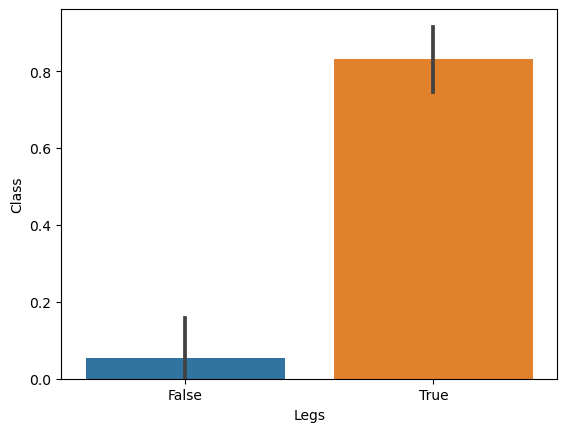

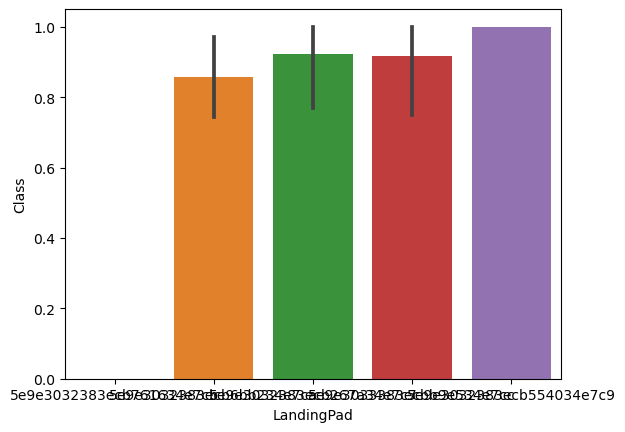

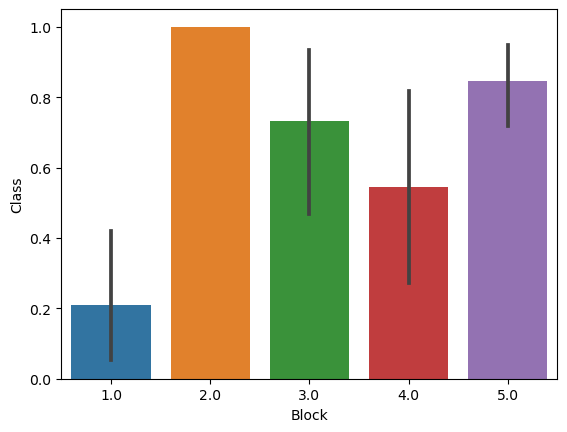

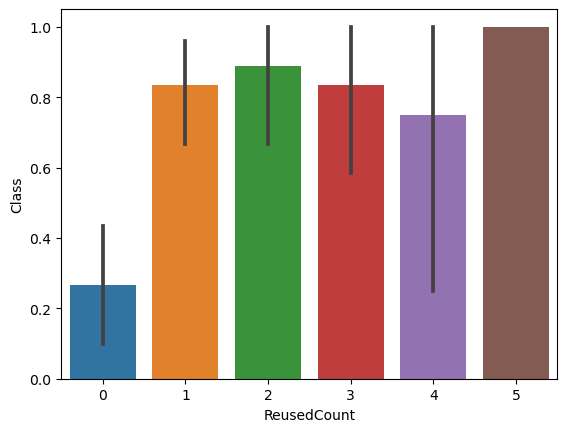

C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\seaborn\categori

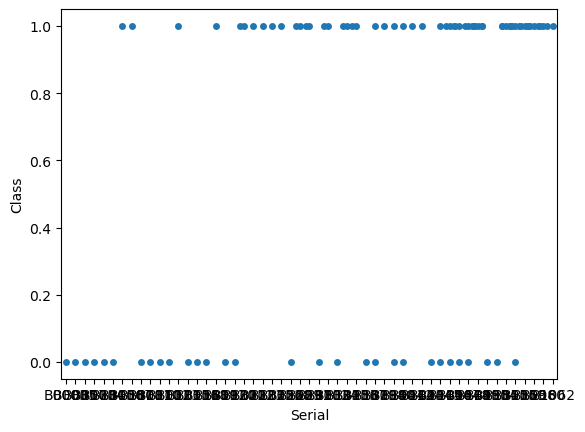

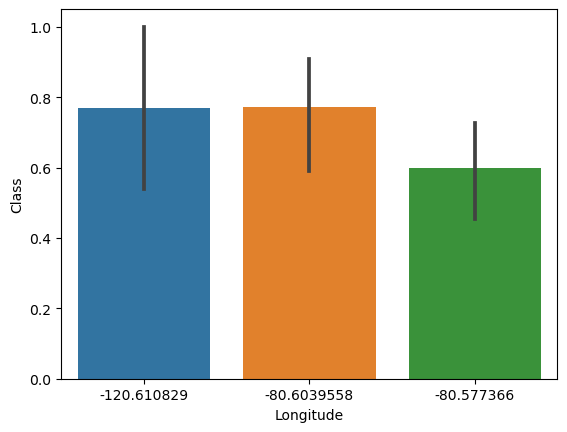

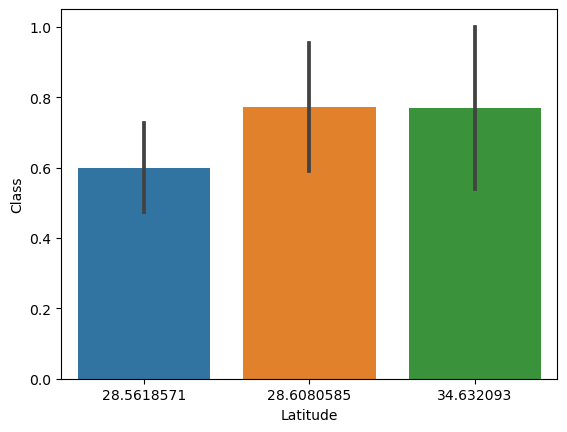

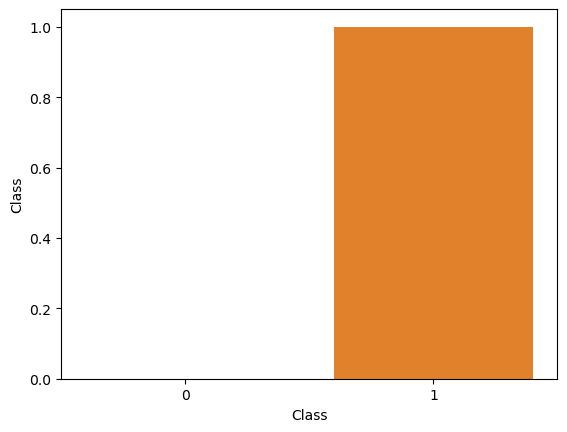

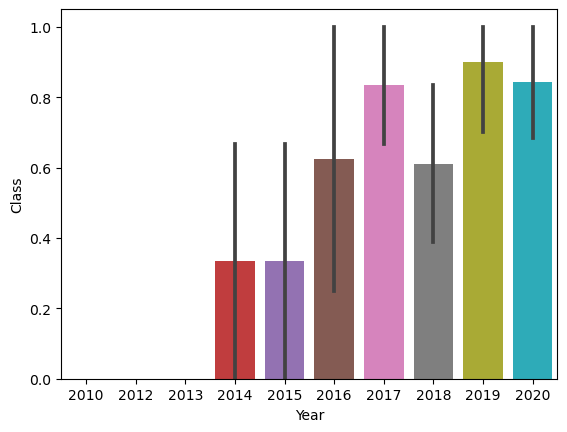

In [13]:
for i in data.columns:
    if data[i].nunique()>11:
        sns.swarmplot(data=data,x=i,y='Class')
    else:
        sns.barplot(data=data,x=i,y='Class')
    plt.show()

In [14]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)
X=X.drop(['GridFins_False','Reused_False','Legs_False'],axis=1)

In [15]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_True,Reused_True,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [16]:
Y= data.Class.to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [17]:
data.Class.value_counts()

1    60
0    30
Name: Class, dtype: int64

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [18]:
# students get this 
transform = preprocessing.StandardScaler()
feature_names=X.columns.values
X=transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
RKF=RepeatedKFold(n_splits=10,n_repeats=5)

we can see we only have 18 test samples.


In [20]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [22]:
parameters ={"C":[0.001,0.01,0.1,1],'penalty':['l1','l2','elasticnet'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}# l1 lasso l2 ridge
lr=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(estimator=lr,param_grid=parameters,cv=10,scoring='accuracy')
logreg_cv.fit(X_train,Y_train)

C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vishal\anaconda3\envs\tf\lib\site-packages\sklearn\linea

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [23]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.8607142857142855


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
logistic_score=logreg_cv.score(X_test,Y_test)
logistic_score

0.8333333333333334

Lets look at the confusion matrix:


[1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1]


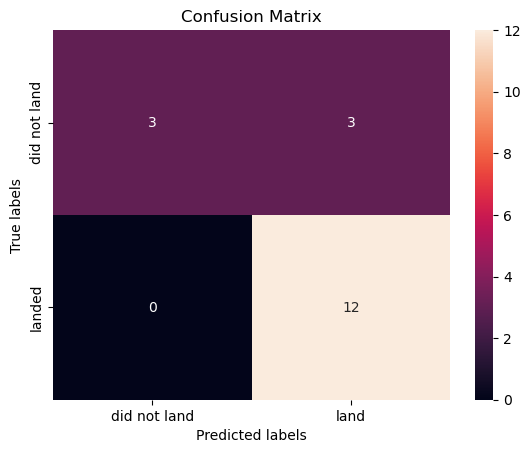

<Figure size 640x480 with 0 Axes>

In [25]:
yhat=logreg_cv.predict(X_test)
yhat_proba=logreg_cv.predict_proba(X_test)
print(yhat)
print(Y_test)
plot_confusion_matrix(Y_test,yhat)

[1.77670212 0.77670212 0.77102753 0.76815249 0.76525233 0.76232712
 0.3128031 ]


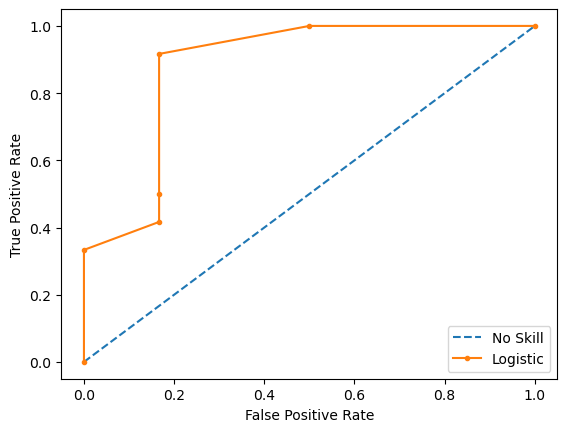

In [26]:
# calculate roc curves
yhat_proba=logreg_cv.predict_proba(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs=yhat_proba[:,1]
ns_fpr, ns_tpr,ns_thresholds = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, yhat_proba[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
print(lr_thresholds)

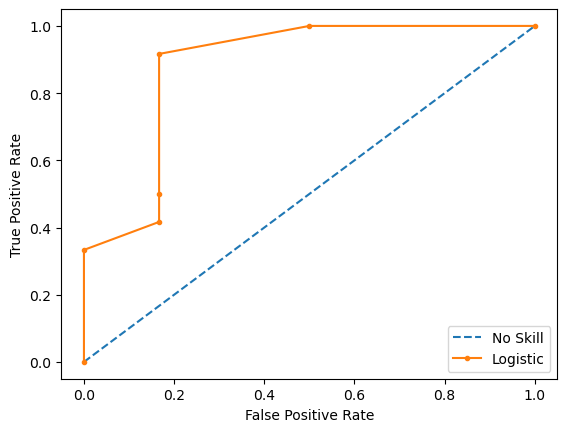

[1.77670212 0.77670212 0.77102753 0.76815249 0.76525233 0.76232712
 0.3128031 ]
thresh: 1.776702116188543
TP:  0
TN:  6
FP:  0
FN:  12


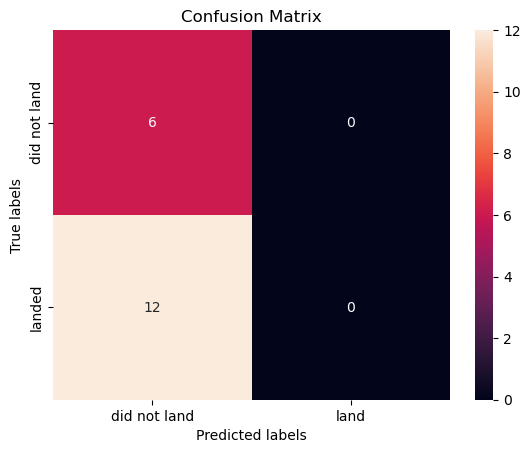

thresh: 0.7767021161885429
TP:  0
TN:  6
FP:  0
FN:  12


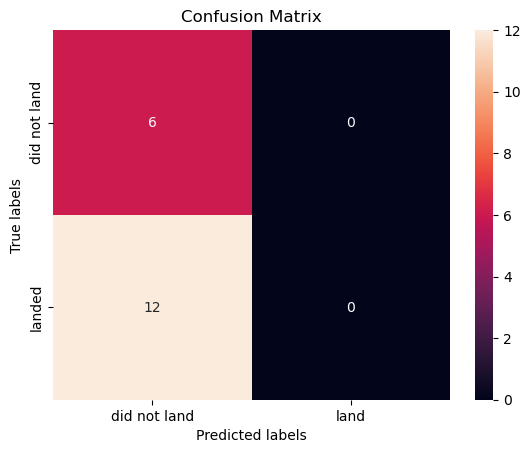

thresh: 0.7710275330437828
TP:  4
TN:  6
FP:  0
FN:  8


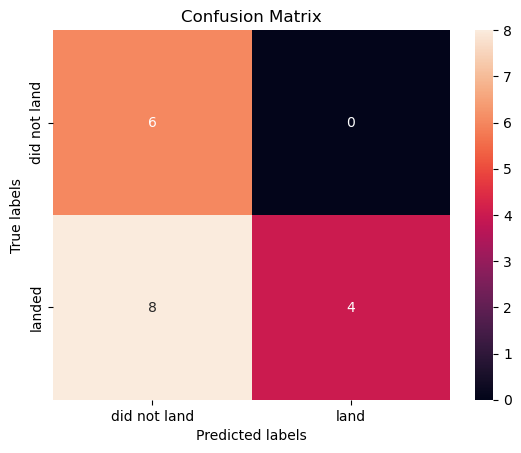

thresh: 0.7681524850997424
TP:  5
TN:  5
FP:  1
FN:  7


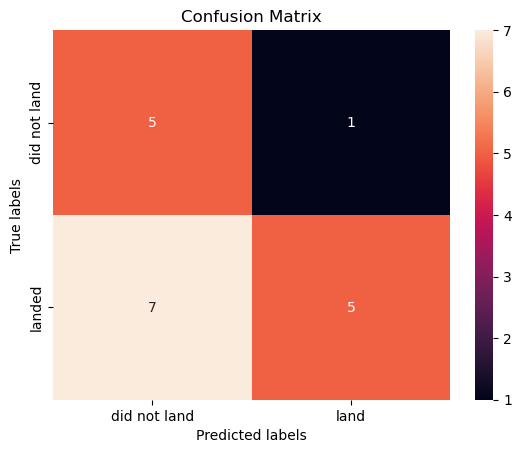

thresh: 0.7652523282074885
TP:  6
TN:  5
FP:  1
FN:  6


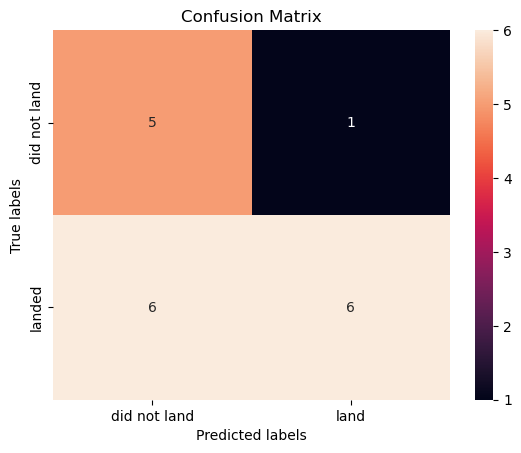

thresh: 0.7623271181968326
TP:  11
TN:  5
FP:  1
FN:  1


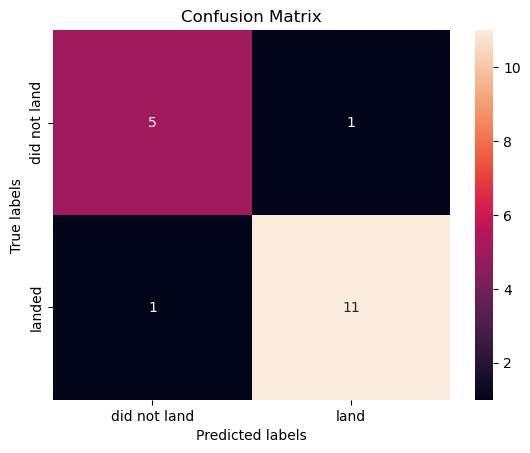

thresh: 0.31280309833727676
TP:  12
TN:  3
FP:  3
FN:  0


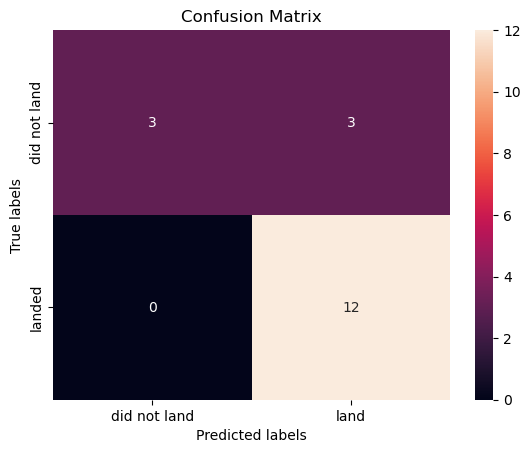

In [27]:
# calculate roc curves
yhat_proba=logreg_cv.predict_proba(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs=yhat_proba[:,1]
ns_fpr, ns_tpr,ns_thresholds = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, yhat_proba[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
print(lr_thresholds)
for thresh in lr_thresholds:
    print('thresh:',thresh)
    yhat_thresh=yhat_proba[:,1]>thresh
    print('TP: ',sum((Y_test ==1) & (yhat_thresh==1)))
    print('TN: ',sum((Y_test ==0) & (yhat_thresh==0)))
    print('FP: ',sum((Y_test ==0) & (yhat_thresh==1)))
    print('FN: ',sum((Y_test ==1) & (yhat_thresh==0)))
    plot_confusion_matrix(Y_test,yhat_thresh)

    plt.show()

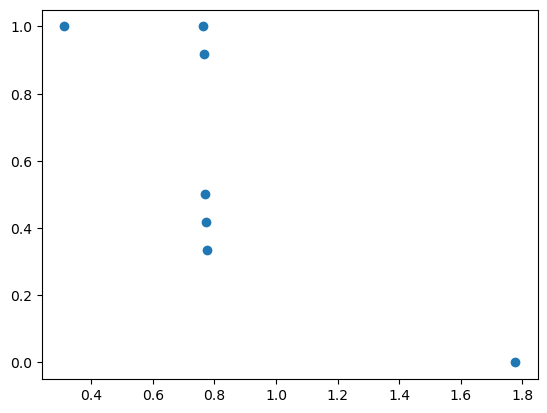

In [28]:
plt.scatter(lr_thresholds,lr_tpr)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [34]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(probability=True)

In [35]:
svm_cv=GridSearchCV(estimator=svm,param_grid=parameters,cv=10,scoring='accuracy')
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [36]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [37]:
svm_score=svm_cv.score(X_test,Y_test)
svm_score

0.8333333333333334

We can plot the confusion matrix


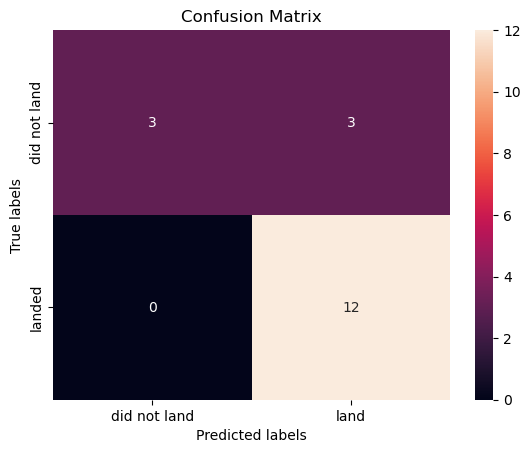

In [38]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

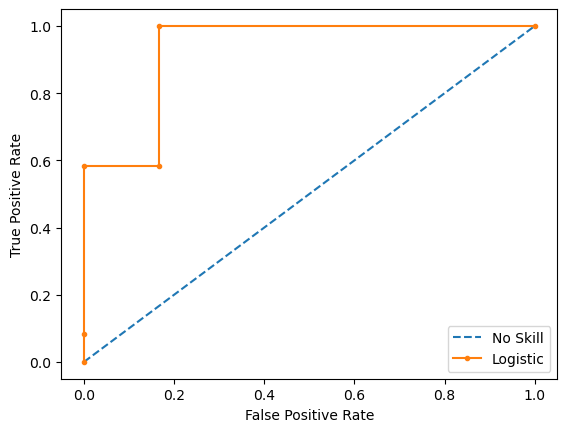

[1.91907088 0.91907088 0.88282356 0.86053884 0.73066911 0.1195919 ]
thresh: 1.9190708799322085
TP:  0
TN:  6
FP:  0
FN:  12


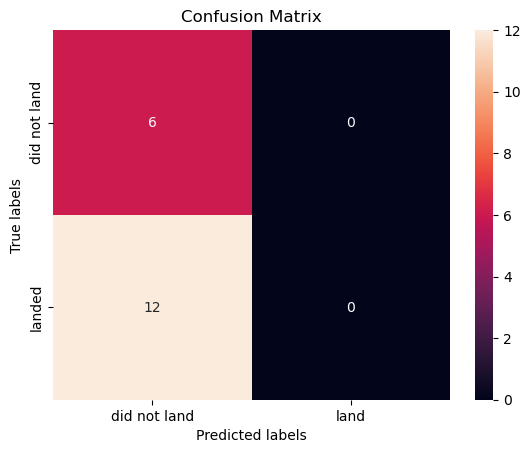

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [False False False False False False False False False False False False
 False False False False False False]
thresh: 0.9190708799322086
TP:  0
TN:  6
FP:  0
FN:  12


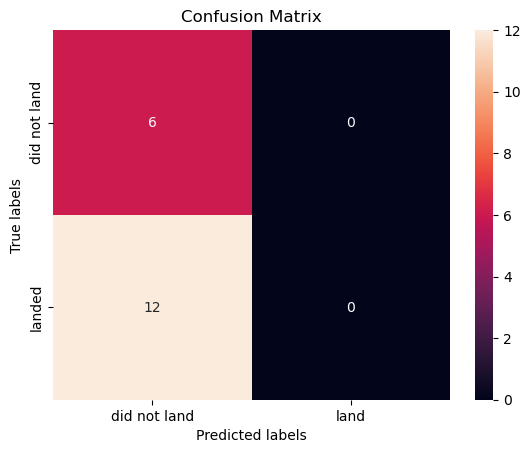

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [False False False False False False False False False False False False
 False False False False False False]
thresh: 0.8828235647192487
TP:  6
TN:  6
FP:  0
FN:  6


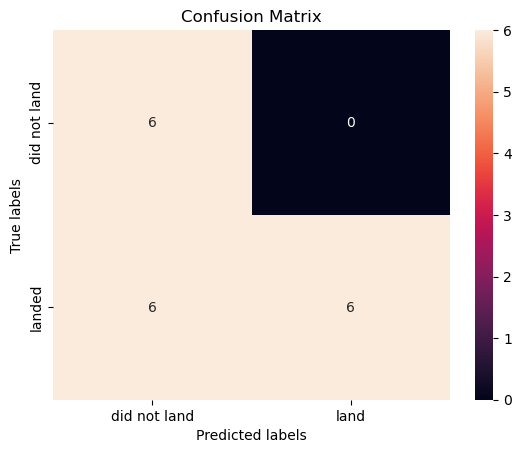

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [False  True  True False  True  True  True False False False False False
 False False  True False False False]
thresh: 0.8605388403147147
TP:  7
TN:  6
FP:  0
FN:  5


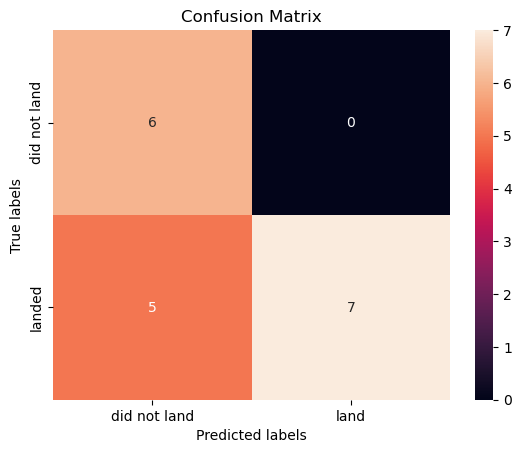

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [False  True  True False  True  True  True False False False False False
 False  True  True False False False]
thresh: 0.7306691101744819
TP:  11
TN:  5
FP:  1
FN:  1


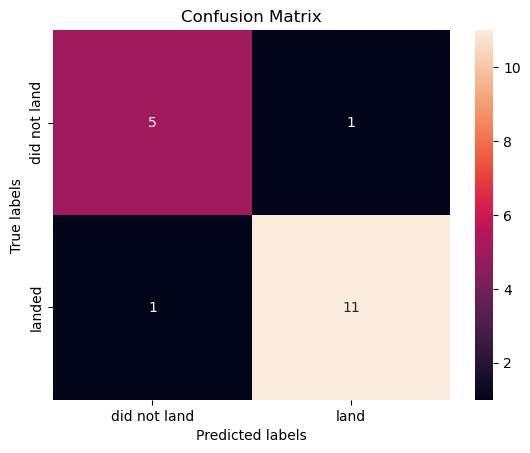

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [ True  True  True  True  True  True  True False  True False False False
  True  True  True  True False False]
thresh: 0.11959190434541145
TP:  12
TN:  1
FP:  5
FN:  0


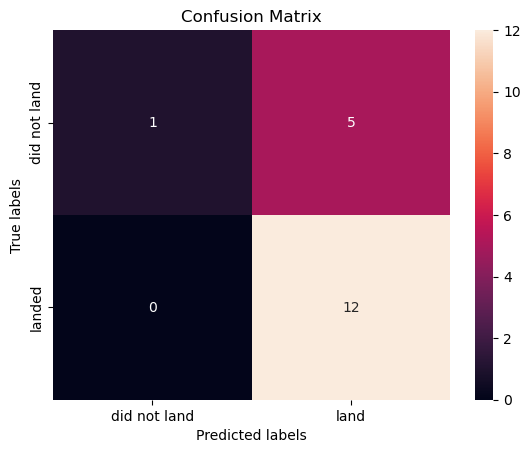

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1] [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True]


In [39]:
# calculate roc curves
yhat_proba=svm_cv.predict_proba(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs=yhat_proba[:,1]
ns_fpr, ns_tpr,ns_thresholds = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, yhat_proba[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
print(lr_thresholds)
for thresh in lr_thresholds:
    print('thresh:',thresh)
    yhat_thresh=yhat_proba[:,1]>thresh
    print('TP: ',sum((Y_test ==1) & (yhat_thresh==1)))
    print('TN: ',sum((Y_test ==0) & (yhat_thresh==0)))
    print('FP: ',sum((Y_test ==0) & (yhat_thresh==1)))
    print('FN: ',sum((Y_test ==1) & (yhat_thresh==0)))
    plot_confusion_matrix(Y_test,yhat_thresh)
    print(Y_test,yhat_thresh)
    plt.show()

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [40]:
parameters = {'criterion': ['gini', 'entropy','log_loss'],
     'splitter': ['best'],
     'max_depth': [n for n in range(1,21)],
     'max_features': ['sqrt','log2'],
     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
     'min_samples_split': [2,3,4,5,6,7,8,9,10]
             }

tree = DecisionTreeClassifier()

In [41]:
tree_cv=GridSearchCV(estimator=tree,param_grid=parameters,cv=10,scoring='accuracy',n_jobs=-1)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best']},
             scoring='accuracy')

In [42]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'best'}
accuracy : 0.8892857142857145


tuned hpyerparameters :(best parameters)  {'criterion': 'log_loss', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9160714285714286

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [43]:
tree_score=tree_cv.score(X_test,Y_test)
tree_score

0.8888888888888888

[Text(0.3333333333333333, 0.9166666666666666, 'ReusedCount <= -0.679\nentropy = 0.918\nsamples = 72\nvalue = [24, 48]\nclass = Success'),
 Text(0.16666666666666666, 0.75, 'entropy = 0.871\nsamples = 24\nvalue = [17, 7]\nclass = Fail'),
 Text(0.5, 0.75, 'Flights <= -0.239\nentropy = 0.599\nsamples = 48\nvalue = [7, 41]\nclass = Success'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = Success'),
 Text(0.6666666666666666, 0.5833333333333334, 'LandingPad_5e9e3032383ecb267a34e7c7 <= 1.011\nentropy = 0.771\nsamples = 31\nvalue = [7, 24]\nclass = Success'),
 Text(0.5, 0.4166666666666667, 'Legs_True <= -0.708\nentropy = 0.811\nsamples = 28\nvalue = [7, 21]\nclass = Success'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Fail'),
 Text(0.6666666666666666, 0.25, 'Orbit_GTO <= 0.436\nentropy = 0.559\nsamples = 23\nvalue = [3, 20]\nclass = Success'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.672\nsam

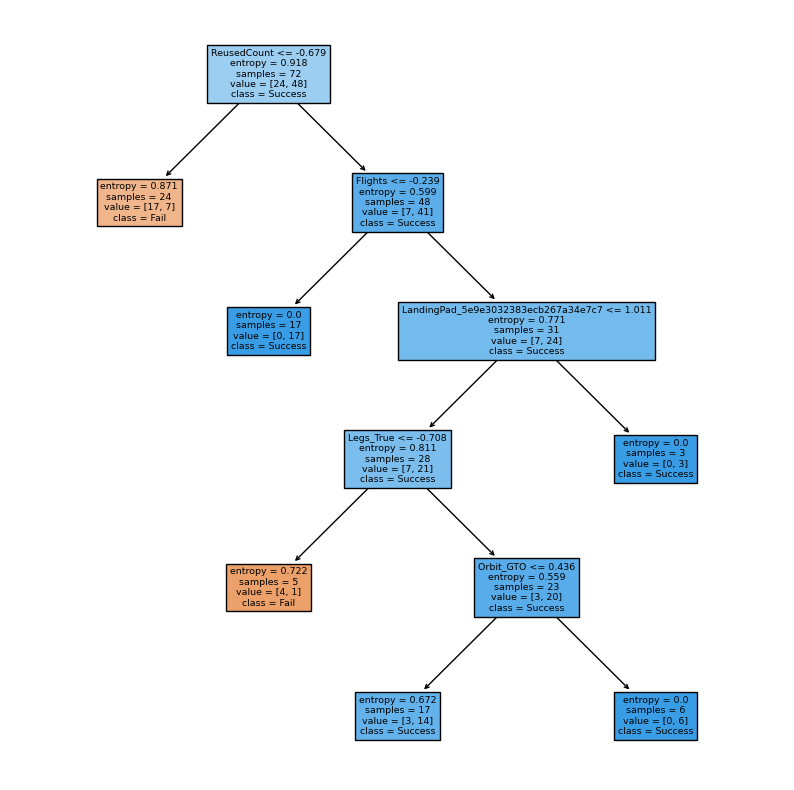

In [44]:
from sklearn import tree as tree_plot
fig,ax=plt.subplots(1,1,figsize=[10,10])
tree_plot.plot_tree(tree_cv.best_estimator_,filled=True,class_names=["Fail","Success"],feature_names=feature_names,ax=ax)

We can plot the confusion matrix


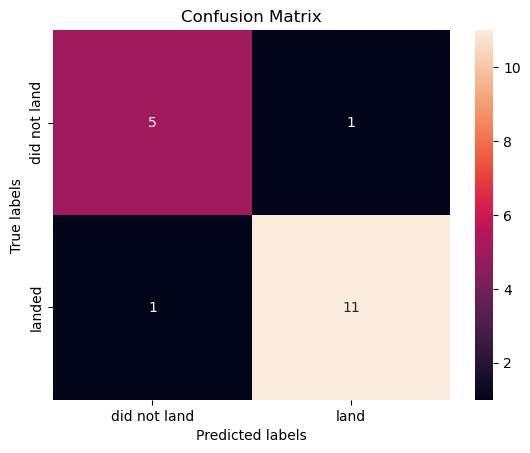

In [45]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

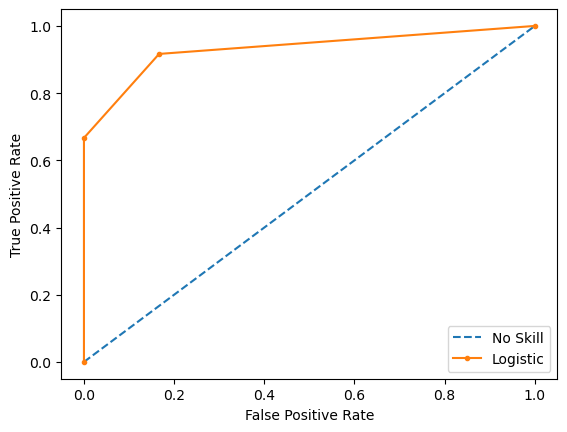

[2.         1.         0.82352941 0.29166667]
thresh: 2.0
TP:  0
TN:  6
FP:  0
FN:  12


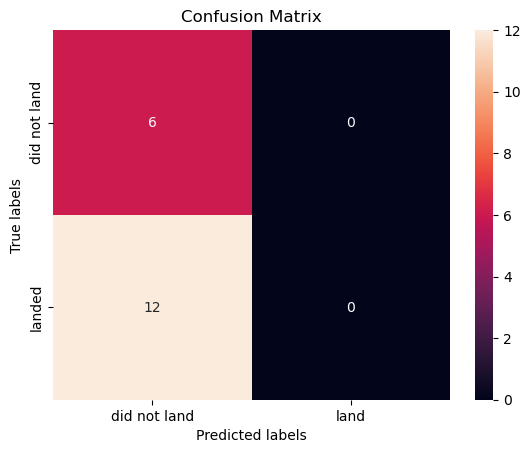

thresh: 1.0
TP:  0
TN:  6
FP:  0
FN:  12


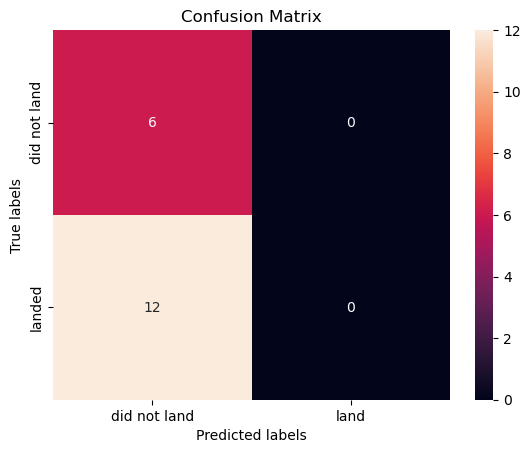

thresh: 0.8235294117647058
TP:  8
TN:  6
FP:  0
FN:  4


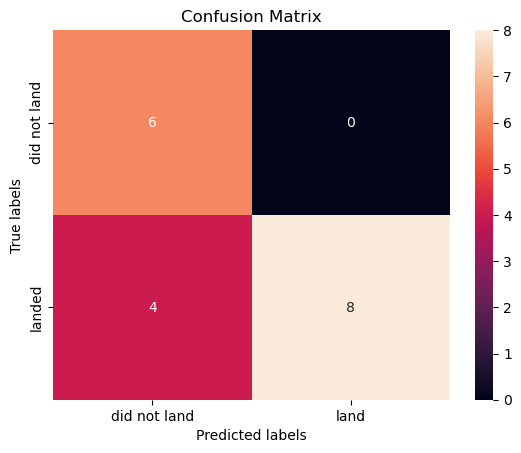

thresh: 0.2916666666666667
TP:  11
TN:  5
FP:  1
FN:  1


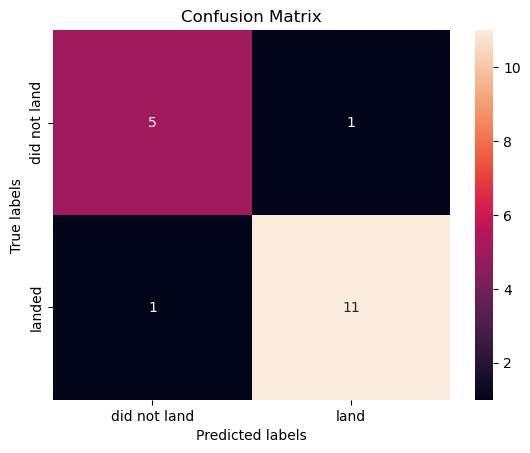

In [48]:
# calculate roc curves
yhat_proba=tree_cv.predict_proba(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs=yhat_proba[:,1]
ns_fpr, ns_tpr,ns_thresholds = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, yhat_proba[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
print(lr_thresholds)
for thresh in lr_thresholds:
    print('thresh:',thresh)
    yhat_thresh=yhat_proba[:,1]>thresh
    print('TP: ',sum((Y_test ==1) & (yhat_thresh==1)))
    print('TN: ',sum((Y_test ==0) & (yhat_thresh==0)))
    print('FP: ',sum((Y_test ==0) & (yhat_thresh==1)))
    print('FN: ',sum((Y_test ==1) & (yhat_thresh==0)))
    plot_confusion_matrix(Y_test,yhat_thresh)
    plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [52]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [53]:
knn_cv=GridSearchCV(estimator=KNN,param_grid=parameters,cv=10,scoring='accuracy')
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [54]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8339285714285714


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [55]:
knn_score=knn_cv.score(X_test,Y_test)
knn_score

0.8333333333333334

We can plot the confusion matrix


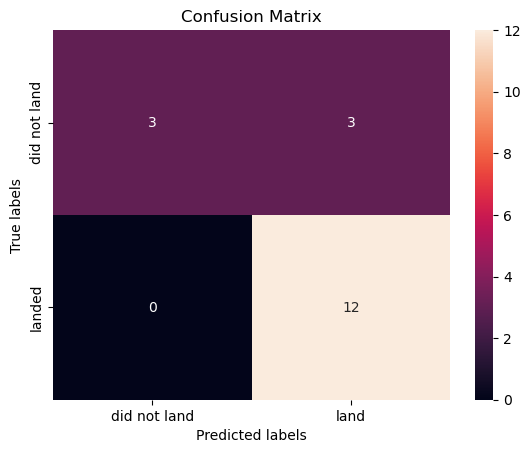

In [56]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

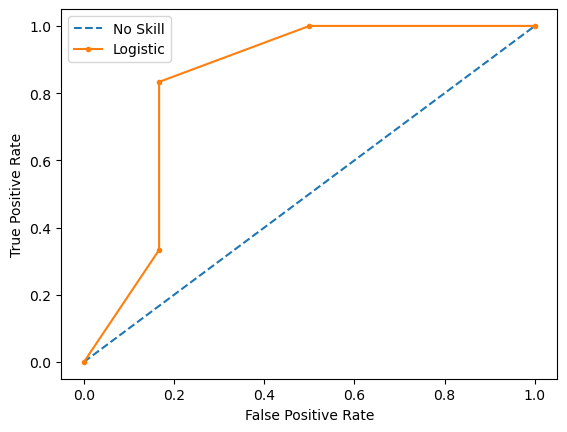

[2.         1.         0.83333333 0.66666667 0.        ]
thresh: 2.0
TP:  0
TN:  6
FP:  0
FN:  12


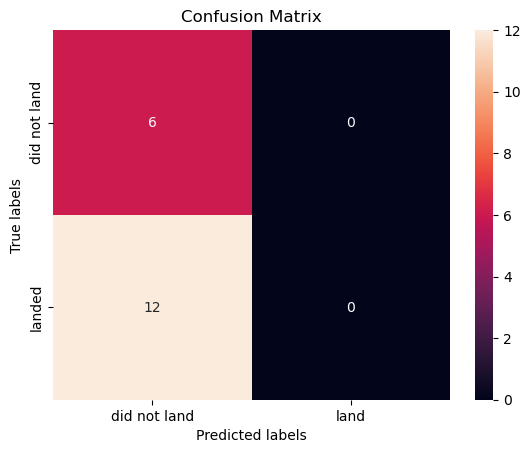

thresh: 1.0
TP:  0
TN:  6
FP:  0
FN:  12


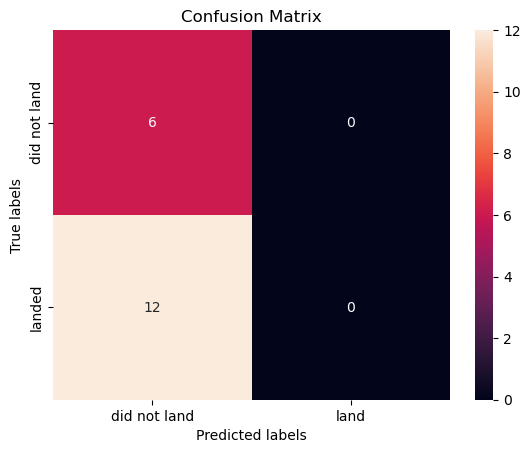

thresh: 0.8333333333333334
TP:  4
TN:  5
FP:  1
FN:  8


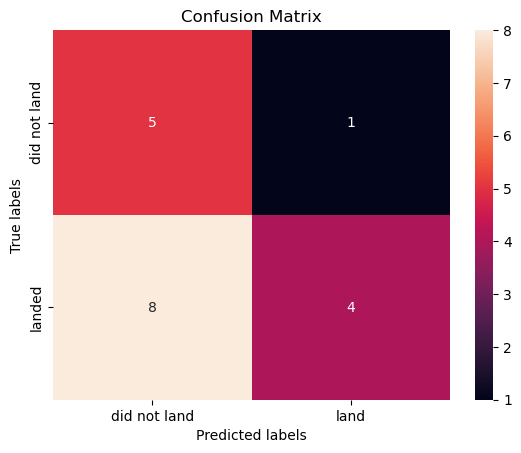

thresh: 0.6666666666666666
TP:  10
TN:  5
FP:  1
FN:  2


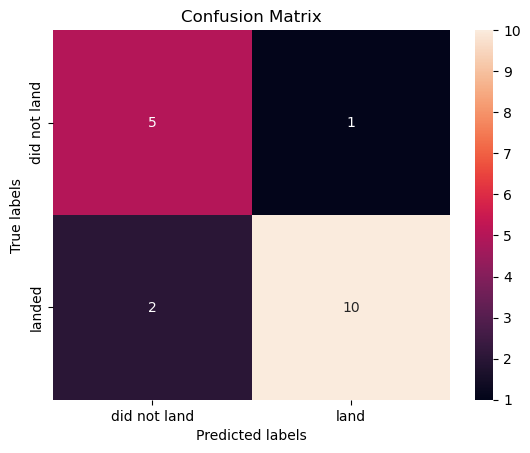

thresh: 0.0
TP:  12
TN:  1
FP:  5
FN:  0


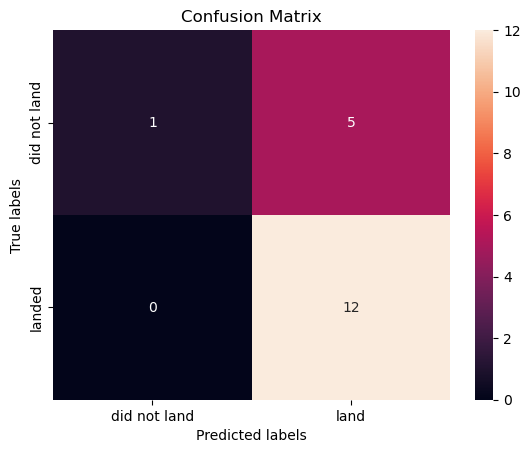

In [60]:
# calculate roc curves
yhat_proba=knn_cv.predict_proba(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs=yhat_proba[:,1]
ns_fpr, ns_tpr,ns_thresholds = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, yhat_proba[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
print(lr_thresholds)
for thresh in lr_thresholds:
    print('thresh:',thresh)
    yhat_thresh=yhat_proba[:,1]>thresh
    print('TP: ',sum((Y_test ==1) & (yhat_thresh==1)))
    print('TN: ',sum((Y_test ==0) & (yhat_thresh==0)))
    print('FP: ',sum((Y_test ==0) & (yhat_thresh==1)))
    print('FN: ',sum((Y_test ==1) & (yhat_thresh==0)))
    plot_confusion_matrix(Y_test,yhat_thresh)
    plt.show()

## TASK  12


Find the method performs best:


In [61]:
scores=pd.DataFrame({'score':[logistic_score,svm_score,tree_score,knn_score]},index=['logistic','svm','tree','knn'])
scores.sort_values(by='score',ascending=False,inplace=True)
print("The best method is:",scores.index[0], 'with a score of:',scores.loc[scores.index[0],'score'])

The best method is: tree with a score of: 0.8888888888888888


In [62]:
scores

,score
tree,0.888889
logistic,0.833333
svm,0.833333
knn,0.833333


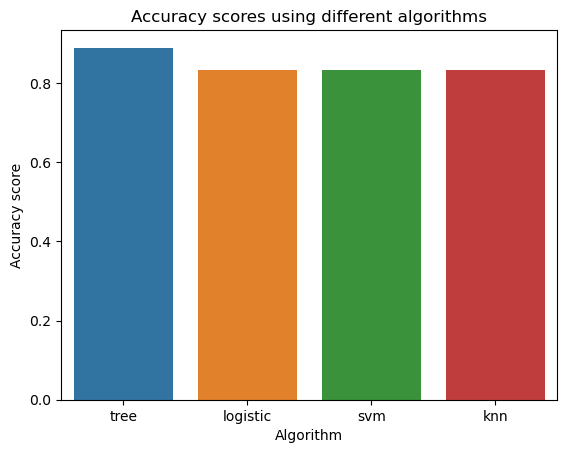

In [63]:
sns.barplot(scores,x=scores.index,y='score')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores using different algorithms")
plt.savefig('Algo_scores.png')

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
